## Imported Required Libraries

In [1]:
!pip install sklearn_crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn_crfsuite import CRF, metrics
import sklearn_crfsuite
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


# Load the dataset
data_path = '/kaggle/input/ner-dataset1/ner_dataset.csv'
data = pd.read_csv(data_path, encoding='latin1').fillna(method="ffill")


/tmp/ipykernel_24/925594248.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = pd.read_csv(data_path, encoding='latin1').fillna(method="ffill")


In [3]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [4]:
# Feature extraction function
def extract_features(sentence):
    return [
        {
            'word': word,
            'is_title': word.istitle(),
            'is_upper': word.isupper(),
            'is_digit': word.isdigit()
        }
        for word in sentence
    ]

# Prepare data for CRF
sentences = [[row['Word'] for _, row in group.iterrows()] for _, group in data.groupby('Sentence #')]
tags = [[row['Tag'] for _, row in group.iterrows()] for _, group in data.groupby('Sentence #')]

In [5]:
print(sentences[0])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']


In [6]:
print(tags[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [7]:
from sklearn.model_selection import train_test_split
X = [extract_features(sentence) for sentence in sentences]
y = tags

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# CRF Model
crf = CRF(algorithm='lbfgs', max_iterations=100)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', max_iterations=100)

In [9]:
# Prediction and Evaluation
y_pred = crf.predict(X_test)
print("CRF Model Evaluation Report:")
print(metrics.flat_classification_report(y_test, y_pred))

CRF Model Evaluation Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        94
       B-eve       0.37      0.16      0.22        70
       B-geo       0.77      0.90      0.83      7558
       B-gpe       0.98      0.86      0.91      3142
       B-nat       0.00      0.00      0.00        40
       B-org       0.79      0.64      0.71      4151
       B-per       0.79      0.68      0.73      3400
       B-tim       0.92      0.74      0.82      4077
       I-art       0.00      0.00      0.00        84
       I-eve       0.34      0.31      0.33        65
       I-geo       0.82      0.69      0.75      1462
       I-gpe       0.94      0.45      0.61        33
       I-nat       0.00      0.00      0.00        13
       I-org       0.70      0.77      0.74      3394
       I-per       0.75      0.87      0.81      3406
       I-tim       0.75      0.64      0.69      1251
           O       0.98      0.99      0.99    177590

    accuracy              

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Import required metrics functions
from sklearn_crfsuite import metrics

# Prediction and Evaluation
y_pred = crf.predict(X_test)

# Detailed classification report
print("CRF Model Evaluation Report:")
print(metrics.flat_classification_report(y_test, y_pred))

# Calculate and print overall Precision, Recall, and F1-Score
overall_precision = metrics.flat_precision_score(y_test, y_pred, average='weighted')
overall_recall = metrics.flat_recall_score(y_test, y_pred, average='weighted')
overall_f1 = metrics.flat_f1_score(y_test, y_pred, average='weighted')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)

CRF Model Evaluation Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        94
       B-eve       0.37      0.16      0.22        70
       B-geo       0.77      0.90      0.83      7558
       B-gpe       0.98      0.86      0.91      3142
       B-nat       0.00      0.00      0.00        40
       B-org       0.79      0.64      0.71      4151
       B-per       0.79      0.68      0.73      3400
       B-tim       0.92      0.74      0.82      4077
       I-art       0.00      0.00      0.00        84
       I-eve       0.34      0.31      0.33        65
       I-geo       0.82      0.69      0.75      1462
       I-gpe       0.94      0.45      0.61        33
       I-nat       0.00      0.00      0.00        13
       I-org       0.70      0.77      0.74      3394
       I-per       0.75      0.87      0.81      3406
       I-tim       0.75      0.64      0.69      1251
           O       0.98      0.99      0.99    177590

    accuracy              

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall Precision: 0.9562916562621504
Overall Recall: 0.9568221893914121
Overall F1 Score: 0.9557086223516693


## **BiDirectional LSTM**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [12]:
data_path = "/kaggle/input/ner-dataset1/ner_dataset.csv"

data = pd.read_csv(data_path, encoding= 'unicode_escape')
# filling the first column that determines which sentence each word belongs to.
data.fillna(method = 'ffill', inplace = True)
data.head()

/tmp/ipykernel_24/1942628254.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = 'ffill', inplace = True)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [13]:
data['Sentence #'].unique()

array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ...,
       'Sentence: 47957', 'Sentence: 47958', 'Sentence: 47959'],
      dtype=object)

In [14]:

 #Group data by sentence number and aggregate words, POS tags, and NER tags
grouped_data = data.groupby('Sentence #').agg({
    'Word': lambda x: ' '.join(x),
    'POS': lambda x: list(x),
    'Tag': lambda x: list(x)
}).reset_index()

# Prepare the final DataFrame with continuous sentence numbering
final_data = pd.DataFrame({
    'Sentence #': [f'Sentence {i+1}' for i in range(len(grouped_data))],  # Continuous numbering
    'Sentence': grouped_data['Word'],
    'POS': grouped_data['POS'],
    'TAG': grouped_data['Tag']
})

# Convert POS and NER lists to string format for display
final_data['POS'] = final_data['POS'].apply(lambda x: str(x))
final_data['TAG'] = final_data['TAG'].apply(lambda x: str(x))

# Display the first few rows of the final DataFrame
print(final_data.head())

   Sentence #                                           Sentence  \
0  Sentence 1  Thousands of demonstrators have marched throug...   
1  Sentence 2  Iranian officials say they expect to get acces...   
2  Sentence 3  Helicopter gunships Saturday pounded militant ...   
3  Sentence 4  They left after a tense hour-long standoff wit...   
4  Sentence 5  U.N. relief coordinator Jan Egeland said Sunda...   

                                                 POS  \
0  ['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...   
1  ['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...   
2  ['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...   
3  ['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...   
4  ['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...   

                                                 TAG  
0  ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...  
1  ['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...  
2  ['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...  
3  ['O', 'O', 'O', 'O', 'O', 'O', 

In [15]:
final_data.Sentence.unique()

array(['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .',
       'Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .',
       'Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .',
       ...,
       "Following Iran 's disputed June 12 elections , rights groups said hundreds of people were detained in clashes with security forces during post-election , anti-government demonstrations .",
       'Since then , authorities have held public trials of the accused and tried to marginalize moderate officials within the government .',
       'The United Nations is praising the use of military helicopters to drop food and rescue survivors in ts

In [16]:
final_data.head()

,Sentence #,Sentence,POS,TAG
0,Sentence 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence 2,Iranian officials say they expect to get acces...,"['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,Sentence 3,Helicopter gunships Saturday pounded militant ...,"['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,Sentence 4,They left after a tense hour-long standoff wit...,"['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence 5,U.N. relief coordinator Jan Egeland said Sunda...,"['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."


In [17]:
X = list(final_data['Sentence'])
Y = list(final_data['TAG'])

In [18]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .', 'Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .']


In [19]:
import ast
# Converting strings to lists
Y = [ast.literal_eval(item) for item in Y]

In [20]:
print("First three Tags: \n")
print(Y[:3])

First three Tags: 

[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']]


#### We need to tokenize the sentences by mapping each word to a unique identifier, then we need to pad them because NN need the input sentences to have the same lenght.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
print("Number of examples: {}".format(len(X)))

Number of examples: 47959


In [23]:
# cutoff reviews after 110 words
maxlen = 110

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [24]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 27953 unique tokens.


In [25]:
word2id = word_index

In [26]:
# dict. that map each identifier to its word
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

In [27]:
## Sentence Padding: pad the sequences so that all sequences are of the same size
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')
# first example after tokenization and padding. 
X_preprocessed[0]

array([ 260,    3,  997,   13, 1838,  245,  452,    4,  545,    1,  121,
          2,   60,    6,  595,    1,  861,    3,  184,   89,   21,   12,
         54,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [28]:
# 22479 example after tokenization and padding. 
X_preprocessed[22479]

array([   35, 13186, 13187,    17,    58,     3,     5,   276,     3,
        1337,   214,  6516,     8, 22551,    12,   444,  1201,     4,
        3755, 14137,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

**Preprocess tags**
we need to preprocess tags by assigning a unique identifier for each one of them.

Since also tags for each example have different lenght we need to fine a way to slove this problem.

We can assign a new tag for the zeros that we used in padding
We can use the O tag for them

In [29]:
tags = data.Tag.unique()
tags

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [30]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [31]:
tags2id

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [32]:
# dict. that map each identifier to its tag
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [33]:
id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [34]:
def preprocess_tags(tags2id, Y_ready):
    
    Y_preprocessed = []
    maxlen = 110
    # for each target 
    for y in Y_ready:
        
        # place holder to store the new preprocessed tag list
        Y_place_holder = []
        
        # for each tag in rhe tag list 
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])
        
        # find the lenght of the new preprocessed tag list 
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list
        
        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags)
        
    return Y_preprocessed

In [35]:
Y_preprocessed = preprocess_tags(tags2id, Y)

In [36]:
print(Y_preprocessed[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
print(Y[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


**By now we have the data ready for training our model**
We have X_preprocessed and Y_preprocessed that we will use to train our model

The las step is to split the data into:

- Training dataset
- Valisdation dataset
- testing dataset

In [38]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 47959
The Lenght of training targets: 47959


In [39]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [40]:
# 70% of the datat will be used for training 
training_samples = 0.7
# 15% of the datat will be used for validation 
validation_samples = 0.15
# 15% of the datat will be used for testing 
testing_samples = 0.15

In [41]:
indices = np.arange(len(Y_preprocessed))

In [42]:
np.random.seed(seed=555)
np.random.shuffle(indices)
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [43]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))


X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))


X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))



Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 33571
Number of validation examples: 7194
Number of testing examples: 7194
Total number of examples after shuffling and splitting: 47959


**Model Training and Evaluation**

In [44]:
X_train[1000]

array([   2,  135,   60, 2479,   17,  265, 3188,    6,   24, 2036, 4187,
         17, 2532,   40,   95,    7, 1253,  109,  377,  405,    6,  184,
         89,   53,   29,  448,    4, 2574,    5, 7450,  184,   51, 1191,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [45]:
Y_train[1000]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
id2word[729]

'begin'

## **Load dataset to the model using train_dataset = tf.data.Dataset**

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [48]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [49]:
import tensorflow as tf

# Parameters
embedding_dim = 300
maxlen = 110
max_words = 36000
num_tags = len(tags)  # Assuming 'tags' is defined elsewhere

# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

model.build(input_shape=(None, maxlen))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 110, 300)       │    10,800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 110, 200)       │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 110, 200)       │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 110, 17)        │         3,417 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,365,017 (43.35 MB)

 Trainable params: 11,365,017 (43.35 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15)

Epoch 1/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.9464 - loss: 0.2702 - val_accuracy: 0.9710 - val_loss: 0.1030
Epoch 2/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9737 - loss: 0.0900 - val_accuracy: 0.9773 - val_loss: 0.0726
Epoch 3/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9790 - loss: 0.0649 - val_accuracy: 0.9792 - val_loss: 0.0655
Epoch 4/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9820 - loss: 0.0531 - val_accuracy: 0.9804 - val_loss: 0.0618
Epoch 5/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9844 - loss: 0.0447 - val_accuracy: 0.9805 - val_loss: 0.0621
Epoch 6/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9863 - loss: 0.0392 - val_accuracy: 0.9806 - val_loss: 0.0633
Epoch 7/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9878 - loss: 0.0347 - val_accuracy: 0.9799 - val_loss: 0.0685
Epoch 8/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9894 - loss: 0.0306 - 

In [51]:
model.evaluate(test_dataset)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9794 - loss: 0.1007


[0.10184427350759506, 0.9792692065238953]

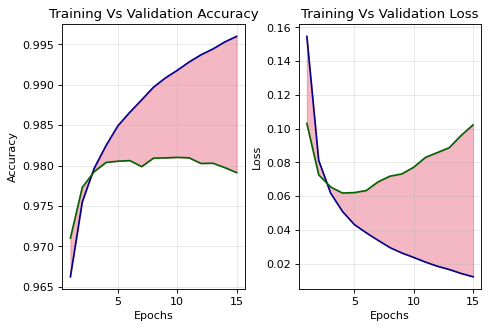

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

In [53]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):
    
    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))
     
    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)
    
    len_orginal_sententce = len(word_list)
    
    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)
    
    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce] 
    
    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])
    
    return orginal_sententce,  pred_tag_list

In [54]:
orginal_sententce,  pred_tag_list = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [55]:
print(orginal_sententce)

mr obama has made one visit to sub saharan africa since becoming president to ghana in july


In [56]:
print(pred_tag_list)

['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O', 'O', 'O', 'B-per', 'O', 'B-geo', 'B-geo', 'B-tim']


In [57]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(test_dataset)
y_pred = y_pred.argmax(axis=-1)  # Convert probabilities to predicted class labels

# Flatten the predictions and true labels to ignore padding
y_true_flat = Y_test.flatten()
y_pred_flat = y_pred.flatten()

# Remove padding tokens (those labeled with the 'O' tag or 0 in this case)
mask = y_true_flat != 0  # Assuming 0 is the padding tag's ID
y_true_flat = y_true_flat[mask]
y_pred_flat = y_pred_flat[mask]

# Print Precision, Recall, and F1 Score
print("Classification Report:\n", classification_report(y_true_flat, y_pred_flat))
print("Precision:", precision_score(y_true_flat, y_pred_flat, average='weighted'))
print("Recall:", recall_score(y_true_flat, y_pred_flat, average='weighted'))
print("F1 Score:", f1_score(y_true_flat, y_pred_flat, average='weighted'))


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.80      0.58      0.67      5571
           2       0.92      0.71      0.80      2328
           3       0.73      0.60      0.66      2577
           4       0.68      0.42      0.52      1098
           5       0.74      0.41      0.53      3104
           6       0.78      0.42      0.54      2462
           7       0.88      0.60      0.71      2994
           8       0.28      0.09      0.14        54
           9       0.09      0.03      0.05        33
          10       0.82      0.63      0.71      2654
          11       0.69      0.29      0.41        31
          12       0.76      0.49      0.59       989
          13       0.71      0.39      0.50        31
          14       0.44      0.19      0.26        43
          15       0.29      0.04      0.07        47
          16     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.